In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
gaming = pd.read_csv('Video Games Sales.csv')
gaming.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [3]:
gaming.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [4]:
gaming.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [5]:
cleaning_g = gaming.dropna(subset=['Year'])
cleaning_g.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [6]:
cleaned_g = cleaning_g.dropna(subset=['Publisher'])
cleaned_g.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [7]:
#cleaned null values
cleaning_g.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [8]:
cleaning_g["is_hit"] = (cleaning_g["Review"] >= 75).astype(int)

print("Hit Count:")
print(cleaning_g["is_hit"].value_counts())

#Proportions
print("Hit Proportion:")
print(cleaning_g["is_hit"].value_counts(normalize=True))
#because the distribution is a bit uneven, make sure to add weights during modeling "class_weight="balanced"

Hit Count:
is_hit
1    1392
0     486
Name: count, dtype: int64
Hit Proportion:
is_hit
1    0.741214
0    0.258786
Name: proportion, dtype: float64


/var/folders/cb/dbz808bj2_17q_gs_qqqgjxw0000gn/T/ipykernel_14563/2617791063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_g["is_hit"] = (cleaning_g["Review"] >= 75).astype(int)


In [9]:
#74% of all games in the cleaned dataset are hits and only 26% are non-hits

#The dataset is heavily imbalanced, with hit games making up 74% of all entries, 
#meaning the model must account for this skew to avoid biasing predictions toward the majority class.

In [10]:
cleaning_g.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review,is_hit
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,950.716720,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243,0.741214
std,550.234127,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957,0.438084
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000,0.000000
25%,474.250000,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000,0.000000
50%,950.500000,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000,1.000000
75%,1426.750000,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000,1.000000
max,1906.000000,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000,1.000000


In [11]:
cleaning_g.to_csv("vid_game.csv", index=False)

In [12]:
#set up features in the decision tree

feature_cols = [
    "Platform",
    "Genre",
    "Publisher",
    "Year",
    "North America",
    "Europe",
    "Japan",
    "Rest of World",
    "Global"
]

#keep only the columns that actually exist in cleaning_g
feature_cols = [col for col in feature_cols if col in cleaning_g.columns]

X = cleaning_g[feature_cols]
y = cleaning_g["is_hit"]

#split categorical & numeric columns
categorical_cols = [c for c in feature_cols if X[c].dtype == "object"]
numeric_cols = [c for c in feature_cols if c not in categorical_cols]

print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: ['Platform', 'Genre', 'Publisher']
Numeric columns: ['Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']


In [13]:
#build preprocessing the decision tree pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#one-hot encode categoricals, pass numeric through
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

#decision tree with class_weight="balanced" to handle uneven hit vs non-hit
tree_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,          
    min_samples_leaf=10,  
    class_weight="balanced", 
    random_state=42
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("tree", tree_clf)
])

In [14]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [15]:
#fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Genre',
                                                   'Publisher']),
                                                 ('num', 'passthrough',
                                                  ['Year', 'North America',
                                                   'Europe', 'Japan',
                                                   'Rest of World',
                                                   'Global'])])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [16]:
#evaluate the model
y_pred = model.predict(X_test)

print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test set: 0.6968085106382979

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.55        97
           1       0.87      0.69      0.77       279

    accuracy                           0.70       376
   macro avg       0.66      0.70      0.66       376
weighted avg       0.76      0.70      0.71       376

Confusion Matrix:
 [[ 69  28]
 [ 86 193]]


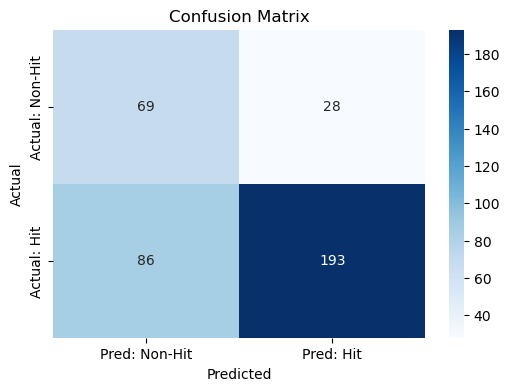

In [17]:
#confusion map visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Pred: Non-Hit", "Pred: Hit"],
            yticklabels=["Actual: Non-Hit", "Actual: Hit"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [18]:
#feature important
ohe = model.named_steps["preprocess"].named_transformers_.get("cat")

if categorical_cols:
    cat_feature_names = list(ohe.get_feature_names_out(categorical_cols))
else:
    cat_feature_names = []

feature_names = cat_feature_names + numeric_cols
tree = model.named_steps["tree"]

importances = pd.Series(tree.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)

print("\nTop 15 most important features:\n")
print(importances.head(15))



Top 15 most important features:

Global                            0.262654
Europe                            0.164984
Japan                             0.107223
Platform_PC                       0.088289
Genre_Misc                        0.082919
Genre_Sports                      0.074923
Platform_Wii                      0.056466
Platform_XB                       0.040789
North America                     0.026530
Publisher_Take-Two Interactive    0.025476
Genre_Role-Playing                0.025276
Year                              0.022301
Rest of World                     0.022168
Platform_NES                      0.000000
Platform_PSV                      0.000000
dtype: float64


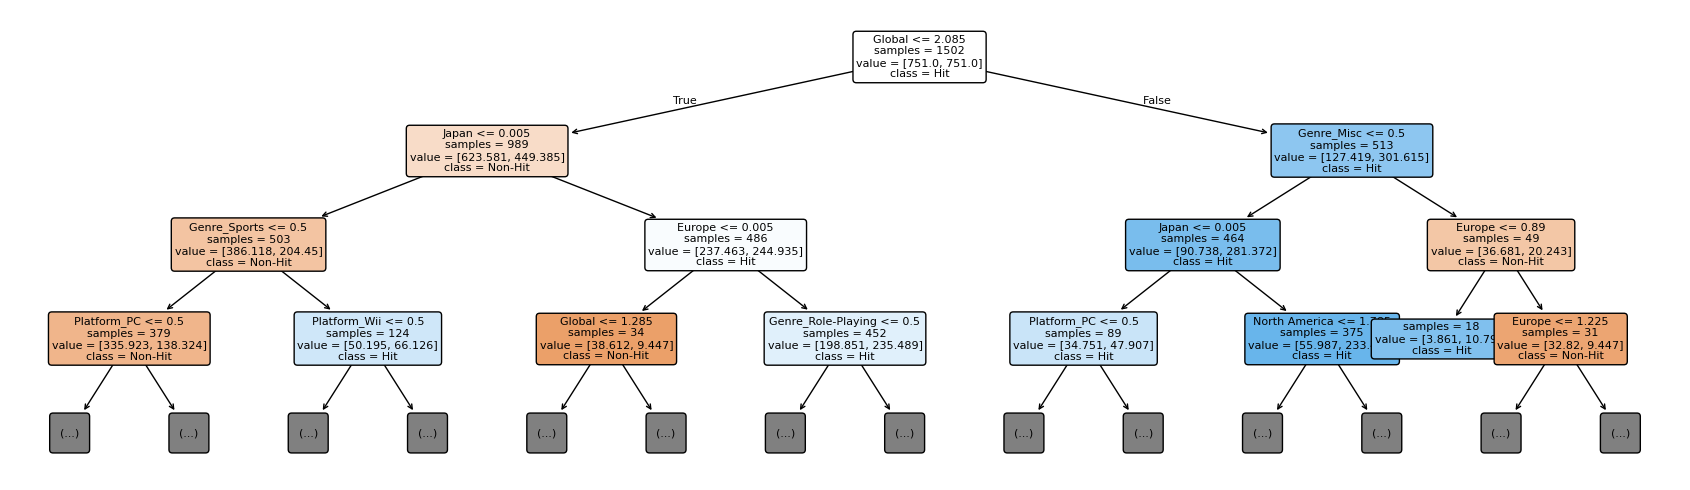

In [49]:
#decision tree visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 5))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=["Non-Hit", "Hit"],
    filled=True,
    max_depth=3,
    fontsize=8,
    impurity=False,
    proportion=False,
    rounded=True
)
plt.tight_layout()
plt.show()

In [20]:
#The model shows that global and regional sales—especially Global, Europe, and Japan—are the strongest drivers of predicting hit games, 
#while platform and genre play secondary but still meaningful roles.

ROC AUC: 0.756


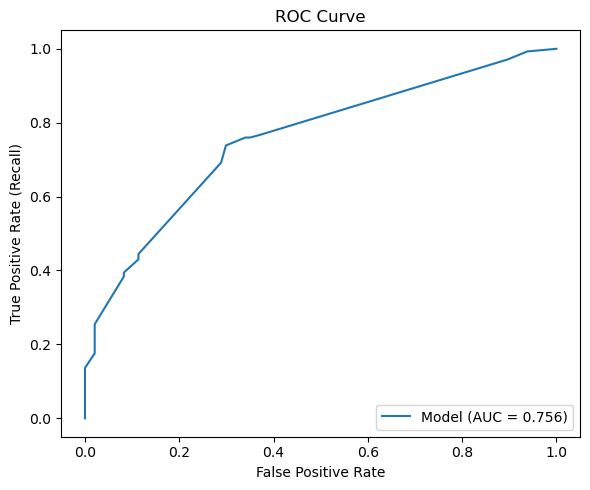

In [53]:
#ROC Visualization
from sklearn.metrics import roc_curve, roc_auc_score

#get predicted probabilities for the positive class (hit = 1)
y_proba = model.predict_proba(X_test)[:, 1]

#compute FPR, TPR for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

#compute AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc_score:.3f}")

#plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc_score:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()